# Programming for AI & Data Science
#### Student: Enoch N. Appiah
##### Created on 16th November 2022

In [1]:
#import libriaries required `
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns

## Data Processing 

### 1. Read in ACW Data csv file

In [2]:
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',' )
    header = next(csv_reader) #get column headers
    rows = [] #get all data rows
    for line in csv_reader:
        #print(line)
        rows.append(line)

In [3]:
print(header)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [4]:
print(rows)

[['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1GH', '22', '16.02', 'Hill-Wright', '11/19', '07/27', '4091726363083888495', '422', '1', 'Antony', 'GB40CVUE84011545859591', 'Jones', 'married or civil partner', '0', 'False', '68049', 'Male', 'GMC', 'Achieva', '2015', 'Convertible, Coupe'], ['Studio 46S Bethany lights', 'East Reece', 'E10 9RJ', '56', '19.35', 'Green LLC', '10/17', '04/18', '4671332769487632633', '669', '2', 'Henry', 'GB40YPKK71613332239280', 'Shaw', '

### 2. Process nested structures for vehicle, credit card and address
1. Vehicle - consists of make, model, year, and type
2. Credit Card - consists of start date, end date, number, security code, and IBAN.
3. Address - consists of the main address, city, and postcode. 

4. handling errors in the dependants column.

In [5]:
vehicle_group = ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
Credit_Card_group = ['Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Bank IBAN']
address_group = ['Address Street', 'Address City', 'Address Postcode']

In [6]:
#get other column headers not in the above set
other_columns = [i for i in header if (i not in vehicle_group + Credit_Card_group + address_group)]
print(other_columns)

['Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Dependants', 'First Name', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex']


In [7]:
def write_json_file(data, filename='output'):
    """
    This Function write a data to a json file
    Data: The data to be written to json
    filename: name of the output file
    """
    with open(filename+'.json', mode='w') as file:
        json.dump( data, file )

In [8]:
 def group_data(header_list, filename = None):
    """
    Function get a list of column header, filter the data and get items for these columns and also handles data type
    header_list: list of column headers that we want to filter
    filename: Name used as output of the json file
    returns a dictionary containing the filtered columns
    """
    filtered_data = {}
    problematic_rows = []
    
    #get index for each header and filter rows for items using this index to a dictionary
    for i in header_list:
        header_index = header.index(i)
        sub_filtered_list = []
        
        #collect all rows for each column by their index position
        for row_index, row in enumerate(rows):
            if header[header_index] in ('Vehicle Year','Credit Card CVV','Credit Card Number','Age (Years)'):
                sub_filtered_list.append(int(row[header_index])) #cast to integer type
            
            elif header[header_index] == 'Dependants':
                try:
                    sub_filtered_list.append(int(row[header_index]))
                except ValueError as error:
                    #print(f"blank at index {row_index} for Column {header[header_index]}")
                    problematic_rows.append(row_index) # collect empty entries to a list
                    sub_filtered_list.append(0) #replace empty entries with 0
                        
            elif header[header_index] == 'Retired':
                sub_filtered_list.append(eval(row[header_index])) #cast to bool type using eval because bool('False') = True
                    
            elif header[header_index] in ('Distance Commuted to Work (miles)','Yearly Pension (GBP)','Yearly Salary (GBP)'):
                sub_filtered_list.append(float(row[header_index])) #cast to float type
                
            else:
                sub_filtered_list.append(row[header_index])
            
        filtered_data[header[header_index]] = sub_filtered_list
            
    #save output to json file        
    if filename == None:
        write_json_file(filtered_data, filename = 'Output')
    else:
        write_json_file(filtered_data, filename)
        
    if len(problematic_rows)>0:
        print(f"Problematic rows for dependants: {problematic_rows}")
        
    return filtered_data

In [9]:
vehicle_data = group_data( vehicle_group, 'vehicle' )
Credit_card_data = group_data( Credit_Card_group, 'credit_card' )
client_address_data = group_data( address_group, 'client_address' )

In [10]:
#group other columns them as one dataset
other_data = group_data(other_columns)

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [11]:
print(vehicle_data)

{'Vehicle Make': ['Hyundai', 'Nissan', 'GMC', 'Scion', 'Buick', 'Lexus', 'Lexus', 'Volvo', 'Volkswagen', 'Dodge', 'Volvo', 'Volkswagen', 'Ford', 'Lincoln', 'Nissan', 'Acura', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Chevrolet', 'Ford', 'MAZDA', 'Toyota', 'Mitsubishi', 'Chrysler', 'Dodge', 'Hyundai', 'Kia', 'Nissan', 'Nissan', 'Aston Martin', 'Ford', 'Acura', 'Saab', 'GMC', 'Jaguar', 'Mercedes-Benz', 'Chevrolet', 'Chevrolet', 'Volkswagen', 'GMC', 'Pontiac', 'Lexus', 'Nissan', 'INFINITI', 'Cadillac', 'Audi', 'Dodge', 'Mercedes-Benz', 'Toyota', 'Chrysler', 'Ford', 'Lincoln', 'Subaru', 'Dodge', 'Cadillac', 'Ford', 'Ford', 'Cadillac', 'Toyota', 'Isuzu', 'Cadillac', 'Chrysler', 'Nissan', 'Plymouth', 'Toyota', 'Mercedes-Benz', 'Jeep', 'Mitsubishi', 'Cadillac', 'Ford', 'GMC', 'Buick', 'Dodge', 'Mercedes-Benz', 'GMC', 'GMC', 'Ford', 'Toyota', 'GMC', 'Toyota', 'Chevrolet', 'Porsche', 'Ford', 'Hyundai', 'Dodge', 'Mercury', 'Chevrolet', 'Ford', 'MAZDA', 'Kia', 'Saturn', 'Land Rover', 'Volvo', 'Lexus

In [12]:
client_address_data.keys()

dict_keys(['Address Street', 'Address City', 'Address Postcode'])

### 4. Writing all records to a `processed.json` file
#### Structure:
Personal Info {First name,
Second name,
Age,
Sex,
Retired,
Marital status,
Dependants,
Salary,
Pension,
Company,
commute distance}

Vehicle {
make,
Model,
Year,
category}

Credit card {
Start date,
End date,
Number,
ccv,
iban}

Address {
Street,
City,
Postcode}

In [13]:
# Dictionaries to use for processed data: vehicle_data, Credit_card_data, client_address_data and other_data
print(f" Vehicle: {list(vehicle_data.keys())}\n")
print(f"Credit Card: {list(Credit_card_data.keys())}\n")
print(f"Address: {list(client_address_data.keys())}\n")
print(f"Personal Info: {list(other_data.keys())}")

 Vehicle: ['Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']

Credit Card: ['Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Bank IBAN']

Address: ['Address Street', 'Address City', 'Address Postcode']

Personal Info: ['Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Dependants', 'First Name', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex']


In [14]:
#Reorder personal info using other_data dictionary
personal_info_reorder = [ 'First Name', 'Last Name', 'Age (Years)', 'Sex', 'Retired', 'Marital Status', 'Dependants', \
                 'Yearly Salary (GBP)', 'Yearly Pension (GBP)', 'Employer Company', 'Distance Commuted to Work (miles)' ]

personal_info_data = {k: other_data[k] for k in personal_info_reorder}
print( list(personal_info_data.keys()) )


['First Name', 'Last Name', 'Age (Years)', 'Sex', 'Retired', 'Marital Status', 'Dependants', 'Yearly Salary (GBP)', 'Yearly Pension (GBP)', 'Employer Company', 'Distance Commuted to Work (miles)']


In [15]:
print(personal_info_data)

{'First Name': ['Kieran', 'Jonathan', 'Antony', 'Henry', 'Jodie', 'Ryan', 'Julian', 'Clive', 'Joan', 'Malcolm', 'Kimberley', 'Stuart', 'Hollie', 'Lawrence', 'Jade', 'Ronald', 'Josephine', 'Tina', 'Lauren', 'Tracy', 'Lynne', 'Sian', 'Lindsey', 'Billy', 'Elliot', 'Jessica', 'Caroline', 'Jack', 'Gavin', 'Dennis', 'Rhys', 'Denis', 'Helen', 'Jeffrey', 'Adam', 'Danielle', 'Joyce', 'Vanessa', 'Dawn', 'Darren', 'Lauren', 'Melanie', 'Vanessa', 'Chelsea', 'Sarah', 'Zoe', 'Sheila', 'Dorothy', 'Ashley', 'Lindsey', 'Grace', 'Albert', 'Geoffrey', 'Adam', 'Peter', 'Christopher', 'Gavin', 'Jeremy', 'Declan', 'Christian', 'Kenneth', 'Abbie', 'Steven', 'Carly', 'Lorraine', 'Jasmine', 'Darren', 'Paula', 'Tracey', 'Carolyn', 'Jill', 'Ashleigh', 'Adrian', 'Beverley', 'Peter', 'Justin', 'Chelsea', 'Shane', 'Mandy', 'Ashley', 'Henry', 'Lewis', 'Wendy', 'Owen', 'Cheryl', 'Rosemary', 'Reece', 'Owen', 'Melissa', 'Helen', 'Lynda', 'Lucy', 'Richard', 'Melissa', 'Georgia', 'Jonathan', 'Harry', 'Amanda', 'Catherine

In [16]:
def get_data_points_for_rows(dict_data):
    """Function takes a dictionary and gets the data points for each person into a key, value dictionary"""
    process_list = [] 
    for i in range(0, len(rows)):
        sub_filtered_list = {}
        for key in list(dict_data.keys()):
            sub_filtered_list[key] = dict_data[key][i]
        #print(sub_filtered_list,'\n')
        process_list.append(sub_filtered_list)
    return process_list


In [17]:
personal_info = get_data_points_for_rows(personal_info_data) #build personal info dictionary
vehicle = get_data_points_for_rows(vehicle_data) #build vehicle info dictionary
credit_card = get_data_points_for_rows(Credit_card_data) #build credit card info dictionary
address = get_data_points_for_rows(client_address_data) #build address info dictionary

In [18]:
personal_info

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly Salary (GBP)': 72838.0,
  'Yearly Pension (GBP)': 7257.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 54016.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (miles)': 13.72},
 {'First Name': 'Antony',
  'Last Name': 'Jones',
  'Age (Years)': 22,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 68049.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Hill-Wright',
  'Distance Commuted to Work (miles)': 16.02},
 {'First Name': 'Henry',
  'L

In [19]:
vehicle

[{'Vehicle Make': 'Hyundai',
  'Vehicle Model': 'Bonneville',
  'Vehicle Year': 2009,
  'Vehicle Type': 'Pickup'},
 {'Vehicle Make': 'Nissan',
  'Vehicle Model': 'ATS',
  'Vehicle Year': 1996,
  'Vehicle Type': 'Coupe'},
 {'Vehicle Make': 'GMC',
  'Vehicle Model': 'Achieva',
  'Vehicle Year': 2015,
  'Vehicle Type': 'Convertible, Coupe'},
 {'Vehicle Make': 'Scion',
  'Vehicle Model': 'F150 SuperCrew Cab',
  'Vehicle Year': 1994,
  'Vehicle Type': 'Pickup'},
 {'Vehicle Make': 'Buick',
  'Vehicle Model': 'Outback',
  'Vehicle Year': 2020,
  'Vehicle Type': 'SUV'},
 {'Vehicle Make': 'Lexus',
  'Vehicle Model': 'Paceman',
  'Vehicle Year': 2004,
  'Vehicle Type': 'Van/Minivan'},
 {'Vehicle Make': 'Lexus',
  'Vehicle Model': 'S-Series',
  'Vehicle Year': 1998,
  'Vehicle Type': 'Van/Minivan'},
 {'Vehicle Make': 'Volvo',
  'Vehicle Model': 'Express 3500 Passenger',
  'Vehicle Year': 2013,
  'Vehicle Type': 'SUV'},
 {'Vehicle Make': 'Volkswagen',
  'Vehicle Model': 'Town & Country',
  'Vehicl

#### Combine all data to get a list of Processed data and save data to json: `processed.json`

In [20]:
processed_data = personal_info.copy()
for i,item in enumerate(processed_data):
    item['Vehicle'] = vehicle[i]
    item['Credit Card'] = credit_card[i]
    item['Address'] = address[i]
    print(item,'\n')
write_json_file(processed_data, filename='processed')

{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age (Years)': 89, 'Sex': 'Male', 'Retired': True, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (GBP)': 72838.0, 'Yearly Pension (GBP)': 7257.0, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Vehicle': {'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': 2009, 'Vehicle Type': 'Pickup'}, 'Credit Card': {'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': 676373692463, 'Credit Card CVV': 875, 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Address': {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ'}} 

{'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age (Years)': 46, 'Sex': 'Male', 'Retired': False, 'Marital Status': 'married or civil partner', 'Dependants': 1, 'Yearly Salary (GBP)': 54016.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Wo

{'First Name': 'Grace', 'Last Name': 'Dodd', 'Age (Years)': 27, 'Sex': 'Female', 'Retired': False, 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Yearly Salary (GBP)': 92377.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Hartley, Sinclair and Price', 'Distance Commuted to Work (miles)': 19.49, 'Vehicle': {'Vehicle Make': 'Cadillac', 'Vehicle Model': 'Highlander', 'Vehicle Year': 2018, 'Vehicle Type': 'Pickup'}, 'Credit Card': {'Credit Card Start Date': '05/16', 'Credit Card Expiry Date': '11/16', 'Credit Card Number': 4673464232723270946, 'Credit Card CVV': 84, 'Bank IBAN': 'GB83TRES11721646963975'}, 'Address': {'Address Street': 'Studio 8 Reece haven', 'Address City': 'Morganton', 'Address Postcode': 'W1 1GE'}} 

{'First Name': 'Amanda', 'Last Name': 'Thomas', 'Age (Years)': 49, 'Sex': 'Female', 'Retired': False, 'Marital Status': 'married or civil partner', 'Dependants': 2, 'Yearly Salary (GBP)': 95126.0, 'Yearly Pension (GBP)': 0.0, 'Employer Company': 'Marsh-

In [21]:
len(processed_data)

1000

In [22]:
len(rows)

1000

### 5. Filtering for all retired and employed customers
#### save as `retired.json` and `employed.json` repectively


In [23]:
# filter all retired customers and save to json file 'retired.json'
Retired_customers = [i for i in processed_data if i['Retired'] == True]
write_json_file(Retired_customers, filename='retired')

In [24]:
print(f"Number of retired customers: {len(Retired_customers)}")

Number of retired customers: 246


In [25]:
Retired_customers

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly Salary (GBP)': 72838.0,
  'Yearly Pension (GBP)': 7257.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0,
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup'},
  'Credit Card': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': 676373692463,
   'Credit Card CVV': 875,
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'}},
 {'First Name': 'Clive',
  'Last Name': 'Evans',
  'Age (Years)': 67,
  'Sex': 'Male',
  'Retired': True,
  'Marital Status': 'single',
  'Dependants': 1,
  'Yearly Salary (GBP)': 27964.0,
  'Yearly Pension (GBP)': 28075.0,
  'Employer

In [26]:
# filter all employed customers and save to json file 'employed.json'
employed_customers = [i for i in processed_data if i['Employer Company'] != 'N/A'] 
write_json_file(employed_customers, filename='employed')

In [27]:
print(f"Number of Employed customers: {len(employed_customers)}")

Number of Employed customers: 754


In [28]:
employed_customers

[{'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 54016.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Begum-Williams',
  'Distance Commuted to Work (miles)': 13.72,
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe'},
  'Credit Card': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': 4529436854129855,
   'Credit Card CVV': 583,
   'Bank IBAN': 'GB37UMCO54540228728019'},
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'}},
 {'First Name': 'Antony',
  'Last Name': 'Jones',
  'Age (Years)': 22,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 68049.0,
  'Yearly Pensio

### 6. Handling credit card entries issues

#### customers with more than 10 years between their start and end date needs writing to a separate file

In [29]:
print(header)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [30]:
rows[0][header.index('Credit Card Start Date')]

'08/18'

In [31]:
def flag_row_base_on_credit_card_year_diff(row):
    """Function gets the difference between the credit card start and expiry date 
    and outputs either to remove this row or not if the year differnce is more that 10
    row: a row from the json file
    returns: 'True' or 'False' -> True means remove row. False is to keep row
    """
    
    start_month = int(row[header.index('Credit Card Start Date')].split('/')[0])
    start_year = int(row[header.index('Credit Card Start Date')].split('/')[1])
    end_month = int(row[header.index('Credit Card Expiry Date')].split('/')[0])
    end_year = int(row[header.index('Credit Card Expiry Date')].split('/')[1])
    if end_month < start_month:
        year_diff = end_year - start_year - 1
    else:
        year_diff = end_year - start_year
    #print( f" {row}\n\nStart Month:{start_month} End Month:{end_month} Start year:{start_year} End year:{end_year} year_diff:{year_diff}\n")
    
    #Flag customers with credit card year_diff more that 10 years
    if year_diff > 10:
        return True
    else:
        return False
        

In [32]:
flag_row_base_on_credit_card_year_diff(rows[1])

True

In [33]:
# apply function on all rows
remove_ccard = []
for row in rows:
    remove_ccard.append(flag_row_base_on_credit_card_year_diff(row))
    
print(f" Number of records to remove: {len([i for i in remove_ccard if i == True])}")
print(f" Number of records to keep: {len([i for i in remove_ccard if i == False])}")   

 Number of records to remove: 193
 Number of records to keep: 807


In [34]:
remove_ccard

[False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 Fals

#### Applying function to remove rows with credit card year differennce more than 10 during reading csv file

In [35]:
#open and read ACW Data csv file applying the flag_row_base_on_credit_card_year_diff to remove rows
with open('acw_user_data.csv') as csv_file:
    csv_reader = csv.reader( csv_file, delimiter=',' )
    header = next(csv_reader) #get column headers
    keep_rows = [] #get all data rows to keep
    remove_rows = [] #get all data rows to remove
    for line in csv_reader:
        if flag_row_base_on_credit_card_year_diff(line) == True:
             remove_rows.append(line)
        else:
            keep_rows.append(line)
            
remove_ccard = [ dict(zip(header,i)) for i in remove_rows ] # convert to list of dictionary for each row
write_json_file(remove_ccard, filename='remove_ccard') # save to json file 

In [36]:
len(remove_ccard)

193

In [37]:
remove_ccard

[{'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (miles)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Date': '11/26',
  'Credit Card Number': '4529436854129855',
  'Credit Card CVV': '583',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '0',
  'Retired': 'False',
  'Yearly Salary (GBP)': '54016',
  'Sex': 'Male',
  'Vehicle Make': 'Nissan',
  'Vehicle Model': 'ATS',
  'Vehicle Year': '1996',
  'Vehicle Type': 'Coupe'},
 {'Address Street': '24 Heather locks',
  'Address City': 'New Mathew',
  'Address Postcode': 'WD10 1LX',
  'Age (Years)': '43',
  'Distance Commuted to Work (miles)': '20.05',
  'Employer Company': 'Clark Group',
  'Credit Card Start Date': '07/12',
  'Credit Ca

### 7. You have been tasked with calculating some additional metrics which will be used for
ranking customers. You should create a new data attribute for our customers called
“Salary-Commute”. Reading in from processed.json:
a. Add, and calculate appropriately, this new attribute. It should represent the
Salary that a customer earns, per mile of their commute.
i. Note: If a person travels 1 or fewer commute miles, then their salarycommute would be just their salary.
b. Sort these records by that new metric, in ascending order.
c. Store the output file out as a JSON format, for a commute.json file

In [38]:
#Read in processed customer json data
with open('processed.json', mode='r') as customers:
    processed_data = json.load(customers)

#add 'salary-commute' variable to the dictionary list : Yearly Salary/Distance Commuted to Work
for i in processed_data:
    if i['Distance Commuted to Work (miles)'] < 1.0:
        i['Salary-Commute'] = i['Yearly Salary (GBP)']
    else:
        i['Salary-Commute'] = round(i['Yearly Salary (GBP)']/i['Distance Commuted to Work (miles)'],2)
    


In [39]:
processed_data

[{'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Age (Years)': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly Salary (GBP)': 72838.0,
  'Yearly Pension (GBP)': 7257.0,
  'Employer Company': 'N/A',
  'Distance Commuted to Work (miles)': 0.0,
  'Vehicle': {'Vehicle Make': 'Hyundai',
   'Vehicle Model': 'Bonneville',
   'Vehicle Year': 2009,
   'Vehicle Type': 'Pickup'},
  'Credit Card': {'Credit Card Start Date': '08/18',
   'Credit Card Expiry Date': '11/27',
   'Credit Card Number': 676373692463,
   'Credit Card CVV': 875,
   'Bank IBAN': 'GB62PQKB71416034141571'},
  'Address': {'Address Street': '70 Lydia isle',
   'Address City': 'Lake Conor',
   'Address Postcode': 'S71 7XZ'},
  'Salary-Commute': 72838.0},
 {'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age (Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Salary (GBP)': 540

In [40]:
#sort list by the salary-commute 
processed_data.sort(key = lambda x: x['Salary-Commute']) 
# save to json file 
write_json_file(processed_data, filename='commute')   

In [41]:
processed_data

[{'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age (Years)': 52,
  'Sex': 'Male',
  'Retired': False,
  'Marital Status': 'single',
  'Dependants': 2,
  'Yearly Salary (GBP)': 17046.0,
  'Yearly Pension (GBP)': 0.0,
  'Employer Company': 'Smith, Birch and Burke',
  'Distance Commuted to Work (miles)': 5.52,
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': 2011,
   'Vehicle Type': 'SUV'},
  'Credit Card': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Number': 4713424668774153,
   'Credit Card CVV': 3053,
   'Bank IBAN': 'GB09ELJH35362236053720'},
  'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Salary-Commute': 3088.04},
 {'First Name': 'Janet',
  'Last Name': 'Quinn',
  'Age (Years)': 30,
  'Sex': 'Female',
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly Sa

## Data Visualisation using Pandas and Seaborn

### Read csv file using pandas

In [42]:
df = pd.read_csv('acw_user_data.csv')

In [43]:
pd.set_option('display.max_columns', 50)
df.head()

Address Street    Address City Address Postcode  Age (Years)  \
0              70 Lydia isle      Lake Conor          S71 7XZ           89   
1           00 Wheeler wells      Chapmanton           L2 7BT           46   
2       Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3  Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4     Flat 3 Christine views    Fletcherstad          WS2 9SN           57   

   Distance Commuted to Work (miles)          Employer Company  \
0                               0.00                       NaN   
1                              13.72            Begum-Williams   
2                              16.02               Hill-Wright   
3                              19.35                 Green LLC   
4                               5.94  Hill, Evans and Harrison   

  Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                  08/18                   11/27         676373692463   
1                  08/12                   11/26     4529436854129855   
2                  11/19                   07/27  4091726363083888495   
3                  10/17                   04/18  4671332769487632633   
4                  04/19                   11/27     2245094149128526   

   Credit Card CVV  Dependants First Name               Bank IBAN Last Name  \
0              875         3.0     Kieran  GB62PQKB71416034141571    Wilson   
1              583         1.0   Jonathan  GB37UMCO54540228728019    Thomas   
2              422         1.0     Antony  GB40CVUE84011545859591     Jones   
3              669         2.0      Henry  GB40YPKK71613332239280      Shaw   
4              659         2.0      Jodie  GB95WAYW31715898077181   O'Brien   

             Marital Status  Yearly Pension (GBP)  Retired  \
0  married or civil partner                  7257     True   
1  married or civil partner                     0    False   
2  married or civil partner                     0    False   
3  married or civil partner                     0    False   
4  married or civil partner                     0    False   

   Yearly Salary (GBP)     Sex Vehicle Make       Vehicle Model  Vehicle Year  \
0                72838    Male      Hyundai          Bonneville          2009   
1                54016    Male       Nissan                 ATS          1996   
2                68049    Male          GMC             Achieva          2015   
3                91337    Male        Scion  F150 SuperCrew Cab          1994   
4                18446  Female        Buick             Outback          2020   

         Vehicle Type  
0              Pickup  
1               Coupe  
2  Convertible, Coupe  
3              Pickup  
4                 SUV

In [44]:
df.dtypes

Address Street                        object
Address City                          object
Address Postcode                      object
Age (Years)                            int64
Distance Commuted to Work (miles)    float64
Employer Company                      object
Credit Card Start Date                object
Credit Card Expiry Date               object
Credit Card Number                     int64
Credit Card CVV                        int64
Dependants                           float64
First Name                            object
Bank IBAN                             object
Last Name                             object
Marital Status                        object
Yearly Pension (GBP)                   int64
Retired                                 bool
Yearly Salary (GBP)                    int64
Sex                                   object
Vehicle Make                          object
Vehicle Model                         object
Vehicle Year                           int64
Vehicle Ty

### compute the mean salary and Median Age

In [45]:
#yearly average salary
salary = df['Yearly Salary (GBP)']
mean_salary = salary.mean()
print(f"The yearly mean salary is {mean_salary:.2f} GBP")

#Get Median customer age
Age = df['Age (Years)']
median_age = Age.median()
print(f"The median age is {int(median_age)}")

The yearly mean salary is 57814.08 GBP
The median age is 54


### univariate and Multivariate plots for data attributes

1. Univariate plots for: distplot
    1. Age using bin_width = 5
    2. Dependents fixing errors with seaborn
    3. Age hue= “Marital status”

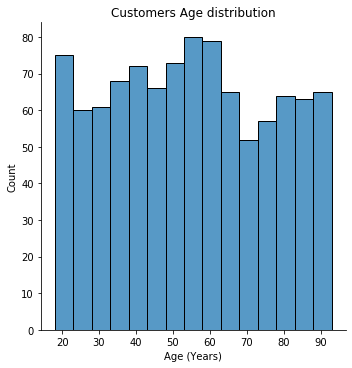

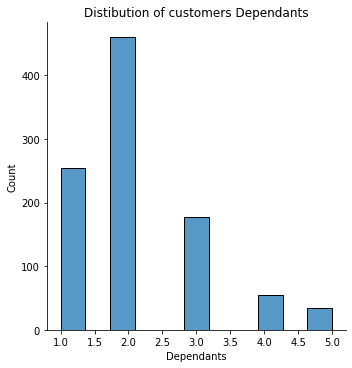

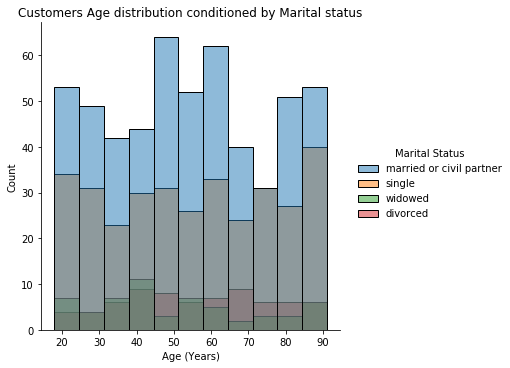

In [46]:
age_plt = sns.displot(df, x='Age (Years)', binwidth=5)
age_plt.set(title ="Customers Age distribution")

dependants_plt = sns.displot(df, x='Dependants')
dependants_plt.set(title ="Distibution of customers Dependants")

age_marital_plt = sns.displot(df, x='Age (Years)', hue='Marital Status')
age_marital_plt.set(title ="Customers Age distribution conditioned by Marital status")

2. Multivariate plots: replot
    1. Commuted distance and salary
    2. Age and salary
    3. Age and salary hue = Dependents

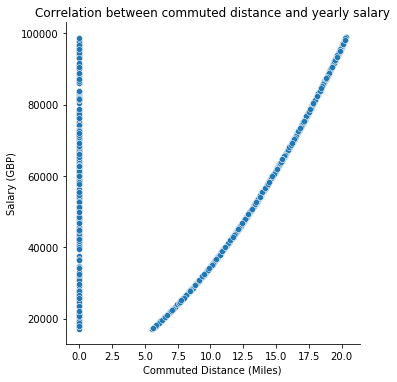

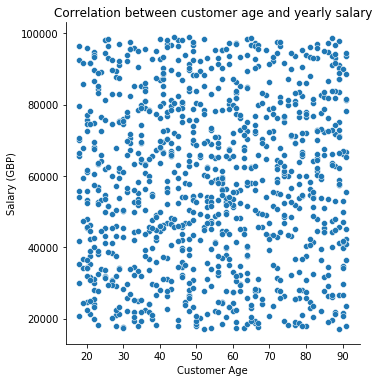

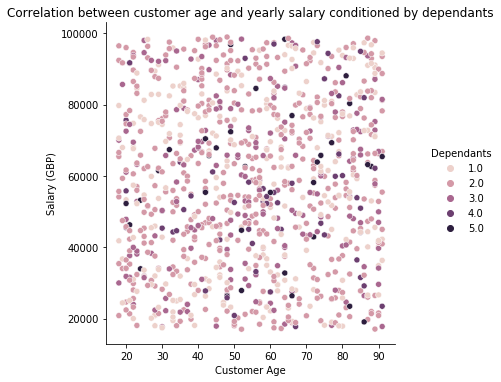

In [47]:
distance_salary_plt = sns.relplot(data=df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)')
distance_salary_plt.set_axis_labels('Commuted Distance (Miles)', 'Salary (GBP)')
distance_salary_plt.set(title ="Correlation between commuted distance and yearly salary")

age_salary_plt = sns.relplot(data=df, x = 'Age (Years)', y = 'Yearly Salary (GBP)')
age_salary_plt.set_axis_labels('Customer Age', 'Salary (GBP)')
age_salary_plt.set(title ="Correlation between customer age and yearly salary")

age_salary_dependants_plt = sns.relplot(data=df, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue= 'Dependants')
age_salary_dependants_plt.set_axis_labels('Customer Age', 'Salary (GBP)')
age_salary_dependants_plt.set(title ="Correlation between customer age and yearly salary conditioned by dependants")


In [48]:
#df[df['Distance Commuted to Work (miles)'] == 0] #check commuted distances with 0.0 miles

### save plots to directory

In [49]:
# create a dictionary containing all plots with file name as key and plot as value
figures_to_save = {}
figures_to_save["./age.png"] = age_plt
figures_to_save["./dependants.png"] = dependants_plt
figures_to_save["./age_maritalStatus.png"] = age_marital_plt
figures_to_save["./distance_salary.png"] = distance_salary_plt
figures_to_save["./age_salary.png"] = age_salary_plt
figures_to_save["./age_salary_dependants.png"] = age_salary_dependants_plt

# save all plots in the figures dictionary 
for key, fig in figures_to_save.items():
    fig.savefig(key)